In [2]:
library(tidyverse)
library(mclust)

## 모델 기반 군집화
- 관찰이 각 군집에 속할 확률이 있는 soft assignment를 제공
- 모델 기반 군집화는 최적의 군집수를 자동으로 식별하는 추가 이점을 제공

In [3]:
data(geyser, package = "MASS")

url <- "https://koalaverse.github.io/homlr/data/my_basket.csv"
my_basket <- readr::read_csv(url)

Rows: 2000 Columns: 42
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (42): 7up, lasagna, pepsi, yop, red.wine, cheese, bbq, bulmers, mayonnai...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### ```Mclust()```
- ```G``` : 군집수 (BIC를 계산할 혼합성분(군집)의 수를 지정), **G를 지정하지 않으면, 자동으로 최적의 값 탐색**
- ```modelNames``` : 군집화의 EM 단계에 적합할 모델을 
    * 일변량 데이터의 경우(d=1): ["E", "V"]
    * 다변수 데이터의 경우(n>d): mclust.options("emModelNames")에서 사용 가능한 모든 모델
    * 다변수 데이터(n<=d): 나선형 및 대각선 모델, ["EII", "VII", "EEI", "EVI", "VEI", "VVI"]

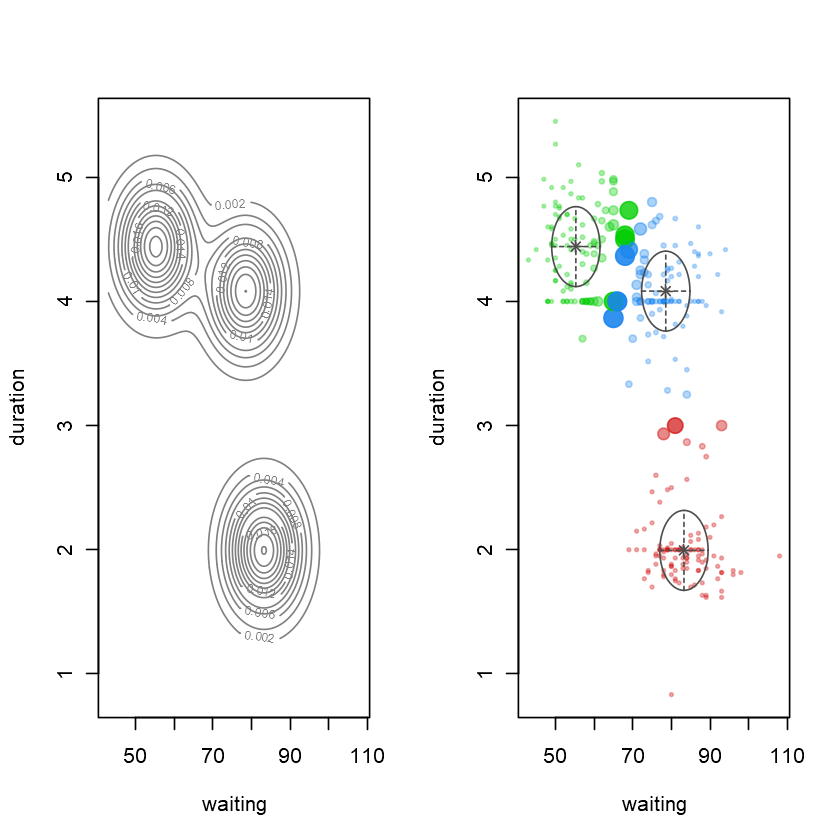

In [5]:
geyser_mc <- Mclust(geyser, G = 3)

par(mfrow = c(1, 2))
plot(geyser_mc, what = "density")
plot(geyser_mc, what = "uncertainty")

- **geyser데이터에서 3개의 군집을 강조 표시하는 다변량 밀도 플롯(왼쪽)**
- **어떤 군집의 구성원인지에 대한 불확실성이 높은 관측값을 강조하는 불확실성 플롯(오른쪽)**

- 확률적 군집 할당은, **군집 불확실성이 높거나 낮은 관측치를 식별**하고 잠재적으로 고유하게 대상을 지정하거나 대체 솔루션을 제공할 수 있도록 하므로 매우 유용

In [14]:
geyser_mc

'Mclust' model object: (EEI,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

In [15]:
summary(geyser_mc)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEI (diagonal, equal volume and shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
      -1371.823 299 10 -2800.65 -2814.577

Clustering table:
  1   2   3 
 91 107 101 

#### 불확실성이 가장 높은 관측값 6개
- **불확실성 : 다른 군집에도 할당될 확률**

In [16]:
sort(geyser_mc$uncertainty, decreasing = TRUE) %>% head() %>% print

      187       211        85       285        28       206 
0.4689087 0.4542588 0.4355496 0.4355496 0.4312406 0.4168440 


### 공분산 유형

- 공분산 행렬은 군집의의 볼륨(양), 모양 및 방향
- 군집과 밀도는, 크기와 모양이 비례

#### 공분산 행렬에 제약조건을 추가, 제약조건은 다음중 하나**
1. 볼륨: 각 군집은 거의 동일한 수의 관측치가 있다
2. 모양: 분포가 구형이 되도록 각 군집은 거의 동일한 분산을 가짐.
3. 방향: 각 군집은 강제로 축 정렬됨.

#### 제약조건의 다양한 조합은, 구형(sphrical), 직교형(diagonal) 및 타원체(general)으로 분류

Model |	Family |	Volume	| Shape	| Orientation	| Identifier |
-- | -- | -- | -- | -- | -- |
1	| Spherical	| Equal | 	Equal  | 	NA	 |  EII |
2	 | Spherical	 | Variable	 |  Equal  | 	NA	  | VII |
3	 |  Diagonal	 |  Equal	 |  Equal	 |  Axes	 |  EEI |
4	 | Diagonal	 | Variable	 | Equal	 | Axes	 | VEI |
5	 | Diagonal	 | Equal	 | Variable	 | Axes	 | EVI |
6	 | Diagonal	 | Variable	 | Variable | 	Axes	 | VVI |
7	 | General	 | Equal	 | Equal	 | Equal	 | EEE |
8	 | General	 | Equal	 | Variable	 | Equal	 | EVE |
9	 | General	 | Variable	 | Equal | 	Equal | 	VEE |
10	 | General	 | Variable	 | Variable	 | Equal	 | VVE | 
11	 | General	 | Equal	 | Equal	 | Variable | 	EEV |
12	 | General	 | Variable	 | Equal	 | Variable	 | VEV |
13	 | General	 | Equal	 | Variable	 | Variable	 | EVV |
14	 | General	 | Variable	 | Variable	 | Variable	 | VVV |

<img src = "https://bradleyboehmke.github.io/HOML/20-model-clustering_files/figure-html/visualize-different-covariance-models-1.png">

#### BIC기준 공분산 매개변수 식별, 최적의 군집수 탐색

In [20]:
geyser_optimal_mc <- Mclust(geyser)

In [21]:
summary(geyser_optimal_mc)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVI (diagonal, varying volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       -1330.13 299 19 -2768.568 -2798.746

Clustering table:
 1  2  3  4 
90 17 98 94 

#### 최적모델은 4개의 군집, BIC값이 가장 낮은 VVI 공분산 매개변수를 사용

In [27]:
attributes(geyser_optimal_mc)

$names
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

$class
[1] "Mclust"

**데이터에 대한 최적의 GMM 모델 및 클러스터 수 식별**

**데이터에서 3개의 군집을 강조 표시하는 다변량 밀도 플롯**

**어떤 군집의 구성원인지에 대한 불확실성이 높은 관측값을 강조하는 불확실성 플롯**

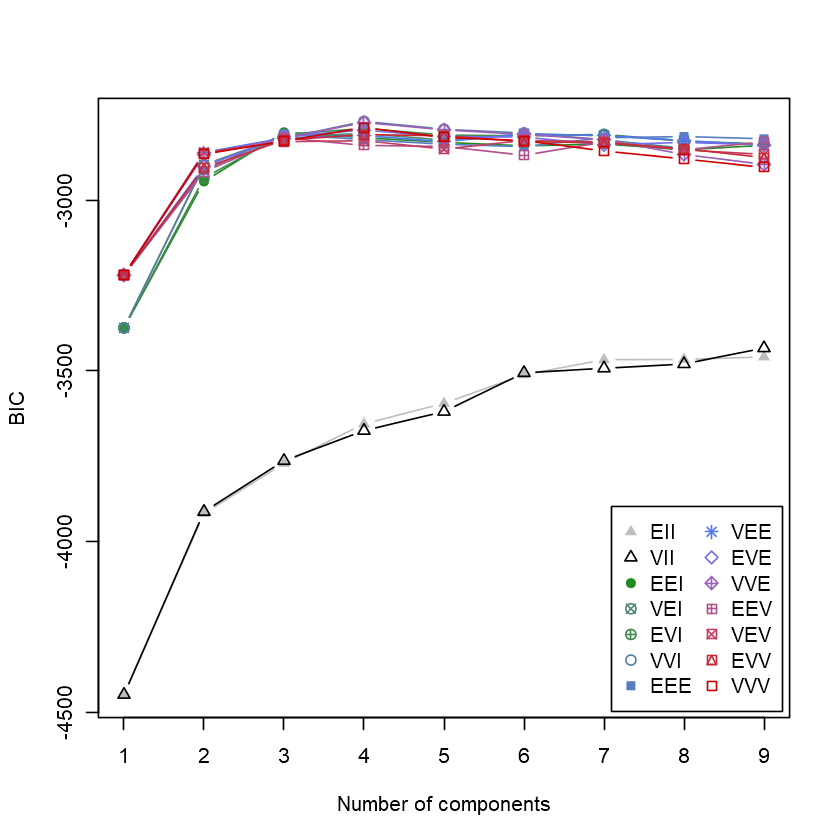

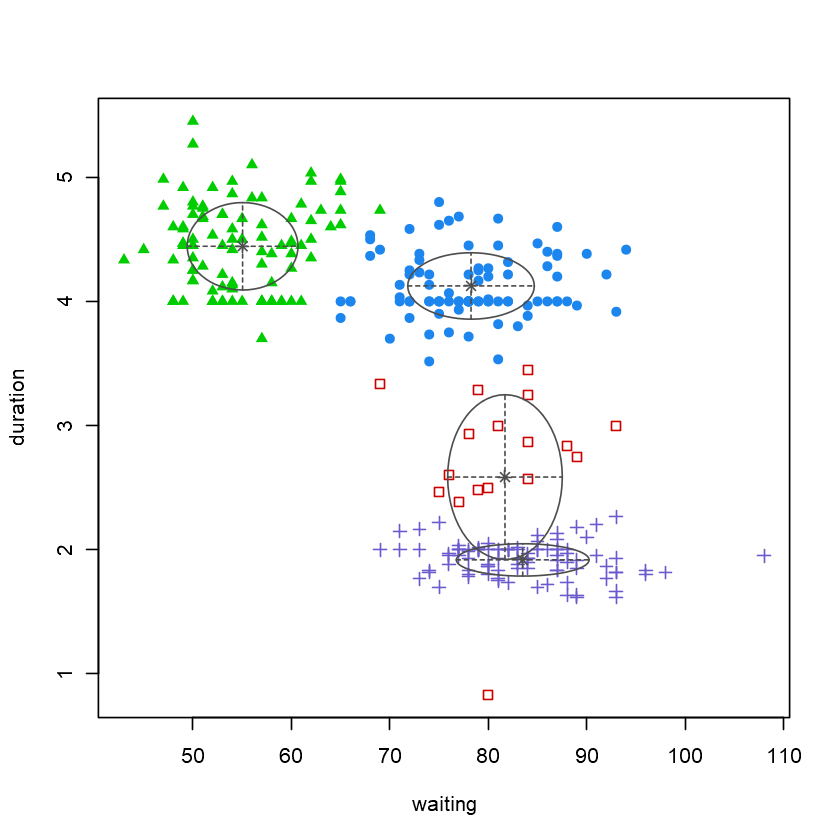

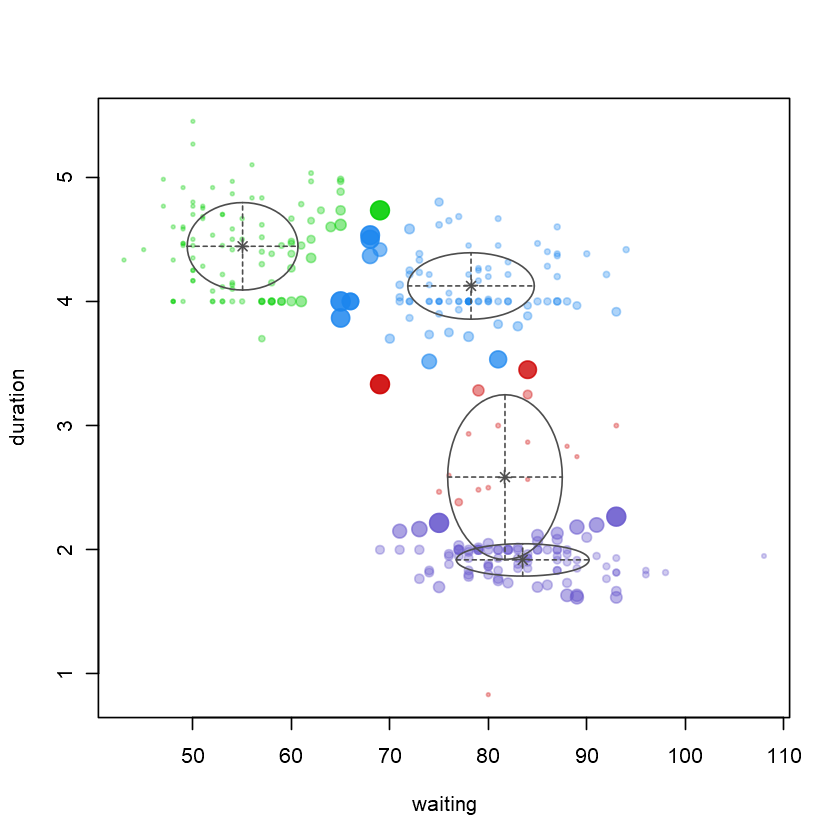

In [39]:
legend_args <- list(x = "bottomright", ncol = 5)
plot(geyser_optimal_mc, what = 'BIC')
plot(geyser_optimal_mc, what = 'classification')
plot(geyser_optimal_mc, what = 'uncertainty')

### my_basket

1 ~ 20의 군집수, 그리드서치

In [45]:
my_basket_mc <- Mclust(my_basket, 1:20)
summary(my_basket_mc)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 6 components: 

 log-likelihood    n   df      BIC       ICL
       8308.915 2000 5465 -24921.1 -25038.38

Clustering table:
  1   2   3   4   5   6 
391 403  75 315 365 451 

**6개의 군집수, EEV 공분산 매개변수**

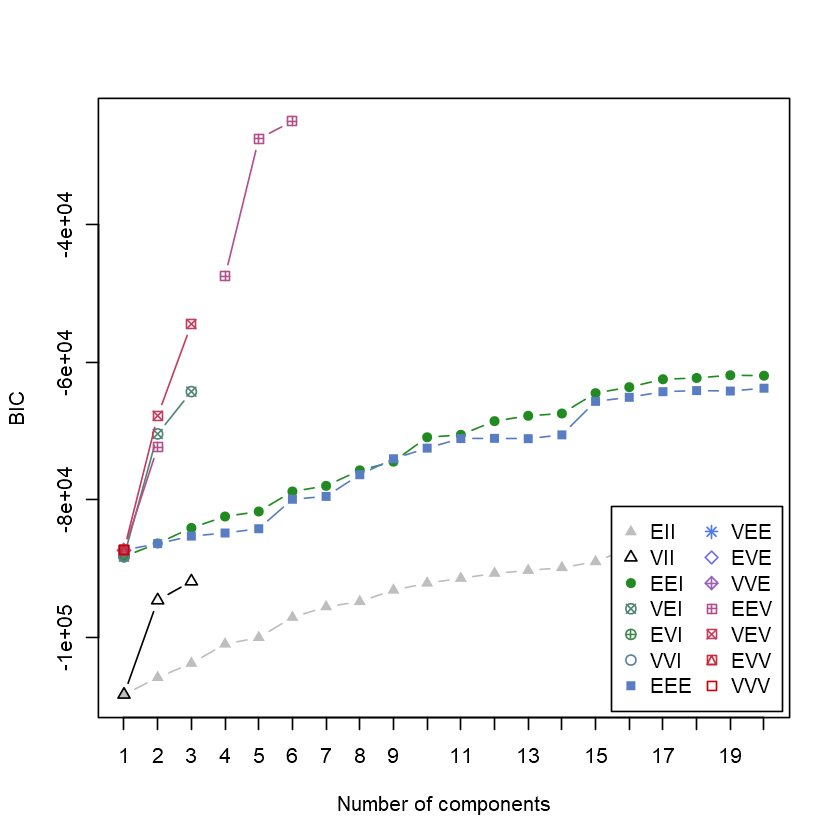

In [46]:
plot(my_basket_mc, what = "BIC")

### 6개의 군집 각각에 정렬된 모든 관측치에 대한 확률 분포

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



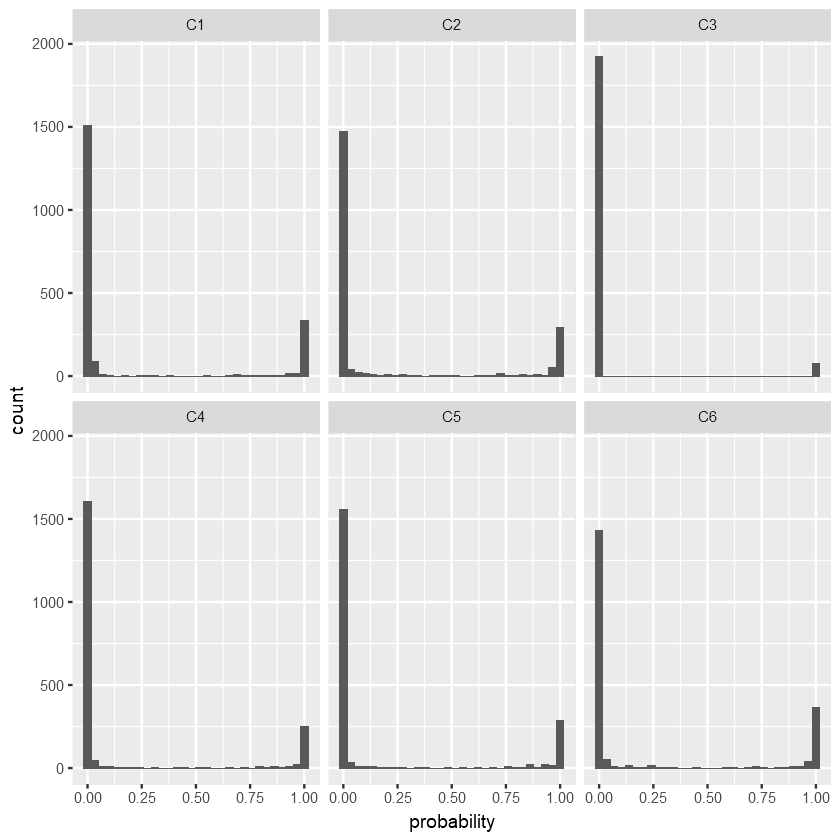

In [49]:
probabilities <- my_basket_mc$z 
colnames(probabilities) <- paste0('C', 1:6)

probabilities <- probabilities %>%
  as.data.frame() %>%
  mutate(id = row_number()) %>%
  tidyr::gather(cluster, probability, -id)

ggplot(probabilities, aes(probability)) +
  geom_histogram() +
  facet_wrap(~ cluster, nrow = 2)

- 군집 C3은 확률범위의 중간이 거의 존재하지 않음. 
- 또한 C3은 적은 수의 관측치가 있음
- 군집에 중간 확률수준(예: 0.25–0.75)으로 더 많은 관측값이 있을수록 군집은 일반적으로 덜 촘촘. 따라서 군집 C2보다 군집 C3은 덜 컴팩트

### **군집별 소속 불확실성이 0.25보다 큰 값들**

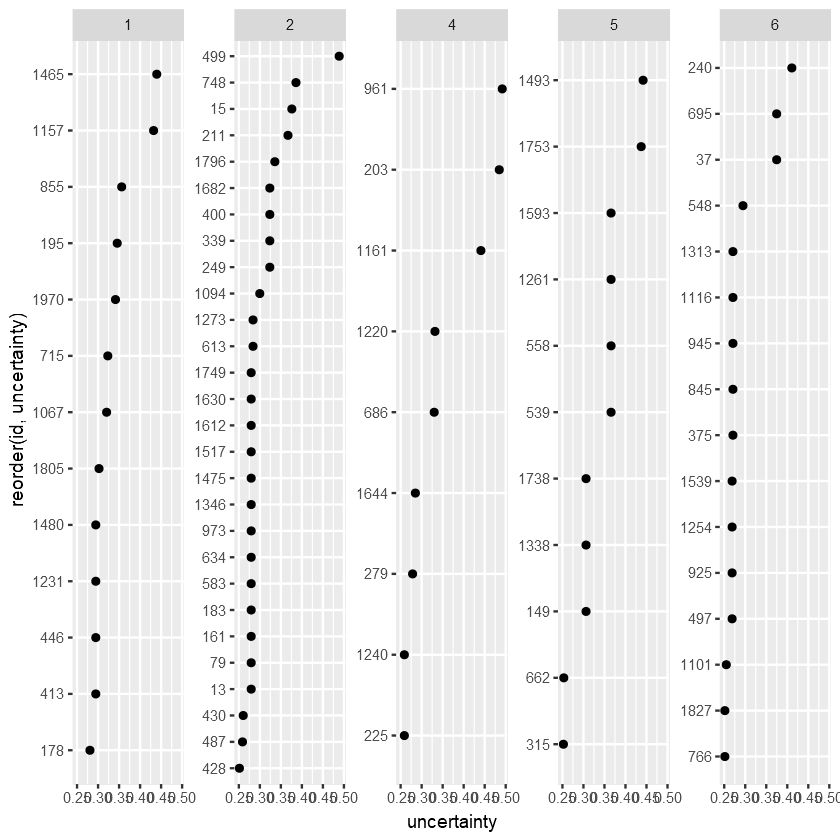

In [53]:
uncertainty <- data.frame(
  id = 1:nrow(my_basket),
  cluster = my_basket_mc$classification,
  uncertainty = my_basket_mc$uncertainty
)

uncertainty %>%
  group_by(cluster) %>%
  filter(uncertainty > 0.25) %>%
  ggplot(aes(uncertainty, reorder(id, uncertainty))) +
  geom_point() +
  facet_wrap(~ cluster, scales = 'free_y', nrow = 1)

**군집 3에 속한 관측값들은 모두 매우 강력한 소속확률을 가짐으로 불확실성이 0.25보다 큰 관측값이 없음 => 군집 3은 표시되지 않음**

#### -군집분석을 수행할 때, 목표는 다른 관측값과 유사한 관측값을 찾아서 군집으로 만드는 것
#### - 이 유사성을 정의하는 것은 데이터 세트가 커질수록 어려워짐

### **모든 바구니에서 각 제품의 수를 표준화한 다음 군집 2를 탐색**

In [ ]:
cluster2 <- my_basket %>%
  scale() %>%
  as.data.frame() %>%
  mutate(cluster = my_basket_mc$classification) %>%
  filter(cluster == 2) %>%
  select(-cluster)

cluster2 %>%
  tidyr::gather(product, std_count) %>%
  group_by(product) %>%
  summarize(avg = mean(std_count)) %>%
  ggplot(aes(avg, reorder(product, avg))) +
  geom_point() +
  labs(x = "Average standardized consumption", y = NULL)

<img src = "https://bradleyboehmke.github.io/HOML/20-model-clustering_files/figure-html/cluster2-consumption-1.png">

- 군집 2에 속한 상품들은 kitkat, twix, lottery, cigarettes etc
- 이 군집에 포함된 상품을 구매한 사람들은, kitkat, twix, lottery, cigarettes등의 광고를 수신할 가능성이 높다